# **MoodSense**

Many individuals struggle to monitor and understand their emotional well-being, leading to challenges in managing mental health effectively. There is a need for an automated system that can track mood patterns, provide personalized insights, and suggest proactive self-care measures to enhance overall mental wellness.

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout

In [3]:
# Load your DataFrame here if not already loaded
df_encoded = pd.read_csv('Dataset.csv')  # Uncomment and update this line if needed

In [4]:
df_encoded.head()

,full_date,date,weekday,time,sub_mood,activities,mood
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful


In [5]:
df_encoded.tail()

,full_date,date,weekday,time,sub_mood,activities,mood
935,04/02/2018,Feb-04,Sunday,8:19 pm,yolo,Write dairy | walk | meditation | Audio book...,Good
936,04/02/2018,Feb-04,Sunday,11:23 am,meh,meditation | youtube | research,Normal
937,04/02/2018,Feb-04,Sunday,6:34 am,blessed,prayer | good meal | youtube | movies,Good
938,03/02/2018,Feb-03,Saturday,7:52 pm,angry,Write dairy | Dota 2 | streaming | shopping,Awful
939,03/02/2018,Feb-03,Saturday,3:12 pm,meh,walk | meditation | Dota 2 | Audio books | s...,Normal


In [6]:
# Encode the 'mood' column
label_encoder = LabelEncoder()
df_encoded['mood_encoded'] = label_encoder.fit_transform(df_encoded['mood'])

In [7]:
# Drop the original 'mood' column
df_encoded.drop(columns=['mood'], inplace=True)

In [8]:
# Define the features and the target variable
X = df_encoded.drop(columns=['full_date', 'date', 'time', 'activities', 'mood_encoded'])
y = df_encoded['mood_encoded']

In [ ]:
# Encode categorical features
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

In [10]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Check the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (752, 2)
Shape of X_test: (188, 2)
Shape of y_train: (752,)
Shape of y_test: (188,)


In [12]:
# Determine the maximum index value in the input data
max_index_value = int(X_train.max().max())

In [13]:
# Define the GRU model
model = Sequential([
    Embedding(input_dim=max_index_value+1, output_dim=128, input_length=X_train.shape[1]),
    GRU(128, return_sequences=True),
    Dropout(0.2),
    GRU(128),
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')
])

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2, 128)            2816      
                                                                 
 gru (GRU)                   (None, 2, 128)            99072     
                                                                 
 dropout (Dropout)           (None, 2, 128)            0         
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 22)                2838      
                                                                 
Total params: 203798 (796.09 KB)
Trainable params: 20379

In [15]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
12/12 [==============================] - 5s 95ms/step - loss: 2.9247 - accuracy: 0.4668 - val_loss: 2.5499 - val_accuracy: 0.5319
Epoch 2/20
12/12 [==============================] - 0s 18ms/step - loss: 1.9395 - accuracy: 0.5146 - val_loss: 1.3917 - val_accuracy: 0.5319
Epoch 3/20
12/12 [==============================] - 0s 18ms/step - loss: 1.3080 - accuracy: 0.5319 - val_loss: 1.1518 - val_accuracy: 0.5691
Epoch 4/20
12/12 [==============================] - 0s 19ms/step - loss: 1.0533 - accuracy: 0.5851 - val_loss: 0.8716 - val_accuracy: 0.5957
Epoch 5/20
12/12 [==============================] - 0s 18ms/step - loss: 0.7579 - accuracy: 0.7340 - val_loss: 0.5325 - val_accuracy: 0.8830
Epoch 6/20
12/12 [==============================] - 0s 18ms/step - loss: 0.4274 - accuracy: 0.8910 - val_loss: 0.3121 - val_accuracy: 0.9096
Epoch 7/20
12/12 [==============================] - 0s 19ms/step - loss: 0.2395 - accuracy: 0.9362 - val_loss: 0.1913 - val_accuracy: 0.9255
Epoch 8/20
12

In [16]:
# Make predictions on the test set
y_pred_probabilities = model.predict(X_test)
y_pred = y_pred_probabilities.argmax(axis=1)

# Map encoded labels back to original moods
y_pred_moods = label_encoder.inverse_transform(y_pred)

# Define suggestions for each mood
mood_suggestions = {
    'happy': ["Keep up the good work!", "Share your happiness with friends.", "Take a moment to enjoy your day."],
    'sad': ["Try some meditation or deep breathing exercises.", "Talk to a friend or family member.", "Engage in a hobby you enjoy."],
    'angry': ["Take a walk to cool down.", "Practice deep breathing.", "Write down what made you angry and reflect on it."],
    'anxious': ["Try some deep breathing exercises.", "Listen to calming music.", "Take a break and do something you enjoy."],
    'neutral': ["Maintain your current routine.", "Try something new to break the monotony.", "Reflect on your day and plan for tomorrow."],
    'awful': ["Take a moment to acknowledge your feelings and allow yourself to experience them without judgment.", "Reach out to a trusted friend or family member for support.", "Engage in self-care activities such as taking a warm bath, going for a walk in nature, or practicing mindfulness meditation."],
    'Chill': ["Embrace the calmness and relaxation you're feeling.", "Use this time to engage in activities that bring you joy and contentment, such as reading a book, listening to your favorite music, or spending time with loved ones.", "Reflect on what may have contributed to this sense of calmness and consider incorporating similar activities into your daily routine to promote overall well-being."],
    'bad': ["Acknowledge that it's okay to not feel your best sometimes, and remember that feelings are temporary.", "Take a moment to identify any triggers or stressors that may have led to this mood and consider ways to address them.", "Practice self-compassion and engage in activities that uplift your mood, such as exercise, creative expression, or spending time with pets."],
    # Add more moods and suggestions as needed
}

6/6 [==============================] - 1s 4ms/step


In [17]:
# Function to get mood input from the user and provide suggestions
def get_mood_suggestions():
    while True:
        mood_input = input("Enter your current mood (happy, sad, angry, anxious, neutral, awful, Chill, bad): ").lower()
        if mood_input in mood_suggestions:
            print("Suggestions for your mood:")
            for suggestion in mood_suggestions[mood_input]:
                print("- " + suggestion)
            break
        else:
            print("Invalid mood! Please enter a valid mood.")

# Call the function to get mood suggestions
get_mood_suggestions()

Enter your current mood (happy, sad, angry, anxious, neutral, awful, Chill, bad): happy
Suggestions for your mood:
- Keep up the good work!
- Share your happiness with friends.
- Take a moment to enjoy your day.


In [18]:
get_mood_suggestions()

Enter your current mood (happy, sad, angry, anxious, neutral, awful, Chill, bad): bad
Suggestions for your mood:
- Acknowledge that it's okay to not feel your best sometimes, and remember that feelings are temporary.
- Take a moment to identify any triggers or stressors that may have led to this mood and consider ways to address them.
- Practice self-compassion and engage in activities that uplift your mood, such as exercise, creative expression, or spending time with pets.


In [19]:
get_mood_suggestions()

Enter your current mood (happy, sad, angry, anxious, neutral, awful, Chill, bad): angry
Suggestions for your mood:
- Take a walk to cool down.
- Practice deep breathing.
- Write down what made you angry and reflect on it.


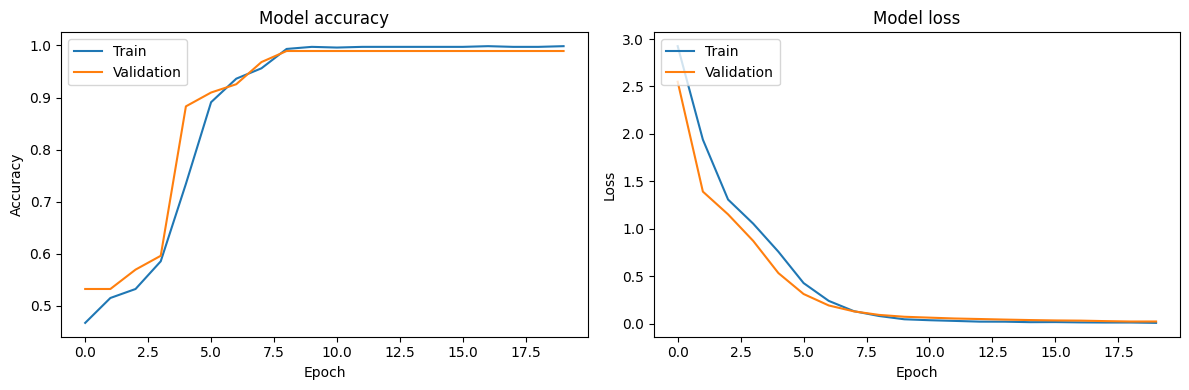

In [20]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()